# Assignment 2

## Exercise 1: Data Preparation

### 1.1

In [134]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns

In [135]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [136]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [137]:
print('Feature names: \n', data.feature_names)

print('\n Target names: \n', data.target_names, '\n')

print('\n Shape of the dataset: \n', df.shape)

Feature names: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

 Target names: 
 ['malignant' 'benign'] 


 Shape of the dataset: 
 (569, 31)


In [138]:
target_counts = df['target'].value_counts()
print(target_counts)
percentages = target_counts / len(df) *100
print(percentages)

target
1    357
0    212
Name: count, dtype: int64
target
1    62.741652
0    37.258348
Name: count, dtype: float64


The dataset contain 569 entries where 357 are malignant and 212 are benign. This show that the dataset is imbalanced but it is not extremely unbalanced.

### 1.2

Text(0.5, 0, 'Feature value')

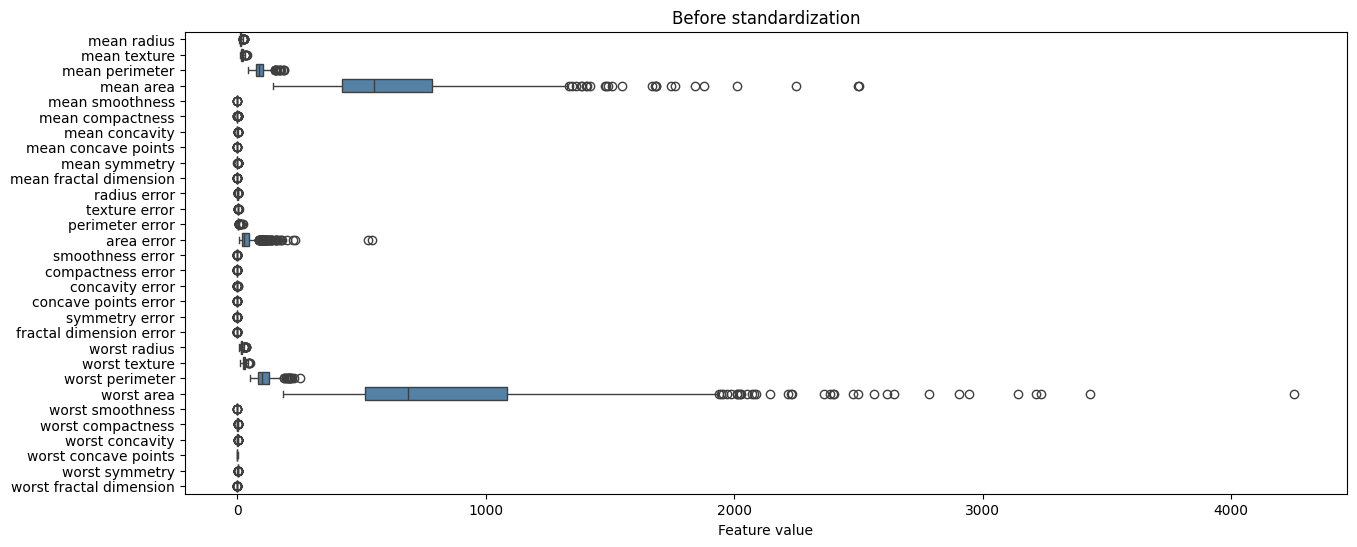

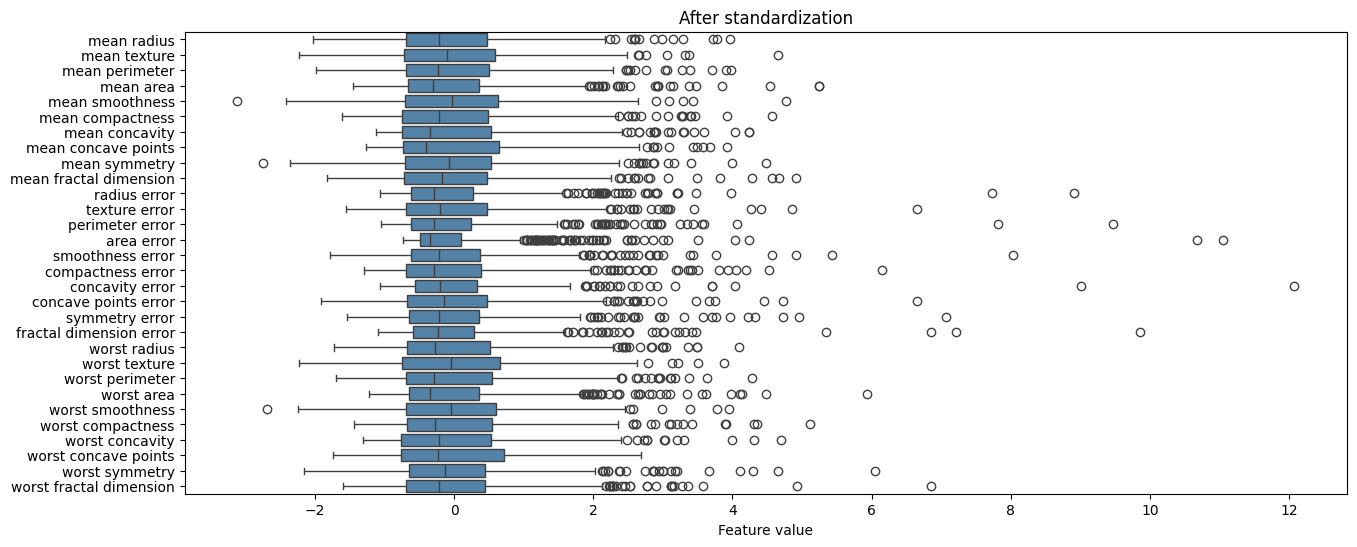

In [139]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

plt.figure(figsize=(15, 6))
sns.boxplot(data=X, orient='h', color='steelblue')
plt.title('Before standardization')
plt.xlabel('Feature value')
plt.show

plt.figure(figsize=(15, 6))
sns.boxplot(data=X_std, orient='h', color='steelblue')
plt.title('After standardization')
plt.xlabel('Feature value')

### 1.3

Using a three way split allows the model to do hyperparameter tuning using the validation set instead of the training which would result in false accuracy. Using cross-validation to tune the hyperparameters makes the model more robust as you get more realistic results from the training set. This helps the robustness as the model can perform over different subsets.

## Exercise 2: Decision Trees

### 2.1

In [140]:
X = data.data
y = data.target

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(341, 30) (114, 30) (114, 30)


In [141]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

cv_scores = cross_val_score(dt_default, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracy: {:.3f} ± {:.3f}".format(cv_scores.mean(), cv_scores.std()))

val_acc = dt_default.score(X_val, y_val)
print("Validation set accuracy: {:.3f}".format(val_acc))

Cross-validation accuracy: 0.906 ± 0.020
Validation set accuracy: 0.965


### 2.2

In [142]:
feature_names = data.feature_names

importance = dt_default.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(feature_importance.head(3))

                 Feature  Importance
20          worst radius    0.711044
27  worst concave points    0.157981
11         texture error    0.039003


Text(0, 0.5, 'Importance')

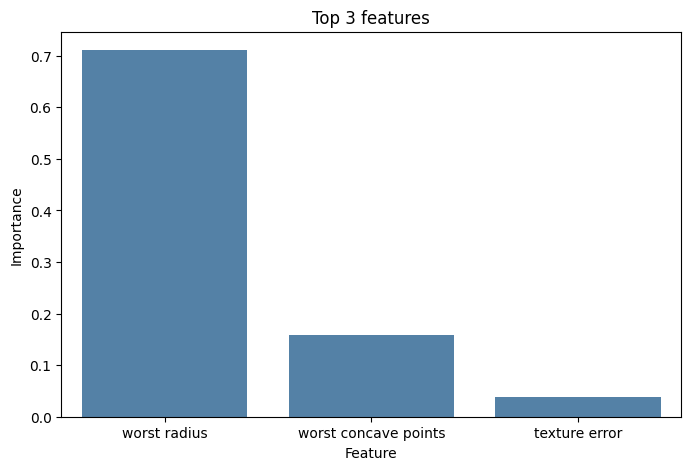

In [151]:
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance['Feature'][:3], y=feature_importance['Importance'][:3], color='steelblue')
plt.title('Top 3 features')
plt.ylabel('Importance')

### 2.3

In [144]:
depths = range(2, 11)
results = []

for d in depths:
    dt = DecisionTreeClassifier(max_depth=d, random_state=42)
    scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
    results.append({
        'max_depth': d,
        'mean_acc': scores.mean(),
        'std_acc': scores.std()
    })

results_df = pd.DataFrame(results)
print(results_df)

   max_depth  mean_acc   std_acc
0          2  0.950171  0.025584
1          3  0.935465  0.028854
2          4  0.920801  0.007389
3          5  0.917945  0.014594
4          6  0.915004  0.016851
5          7  0.906181  0.019825
6          8  0.906181  0.019825
7          9  0.906181  0.019825
8         10  0.906181  0.019825


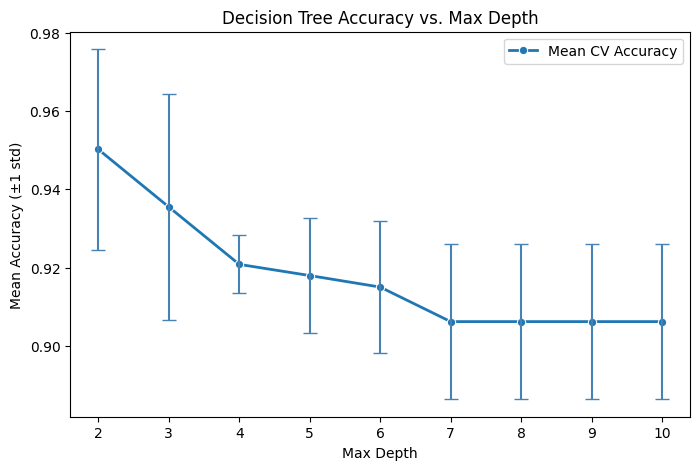

In [146]:
plt.figure(figsize=(8,5))
sns.lineplot(
    data=results_df,
    x='max_depth',
    y='mean_acc',
    marker='o',
    err_style='bars',
    linewidth=2,
    label='Mean CV Accuracy'
)

plt.errorbar(results_df['max_depth'], results_df['mean_acc'],
             yerr=results_df['std_acc'], fmt='none', ecolor='steelblue', capsize=5)

plt.title("Decision Tree Accuracy vs. Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Mean Accuracy (±1 std)")
plt.legend()
plt.show()

### 2.4

In [147]:
leaf_values = [1, 2, 4, 6, 8, 10]
results = []

for leaf in leaf_values:
    dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=leaf, random_state=42)
    scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
    results.append({
        'min_samples_leaf': leaf,
        'mean_acc': scores.mean(),
        'std_acc': scores.std()
    })

results_df = pd.DataFrame(results)
print(results_df)

   min_samples_leaf  mean_acc   std_acc
0                 1  0.917945  0.014594
1                 2  0.912020  0.022788
2                 4  0.920801  0.020015
3                 6  0.935465  0.033047
4                 8  0.941347  0.024610
5                10  0.953069  0.025317


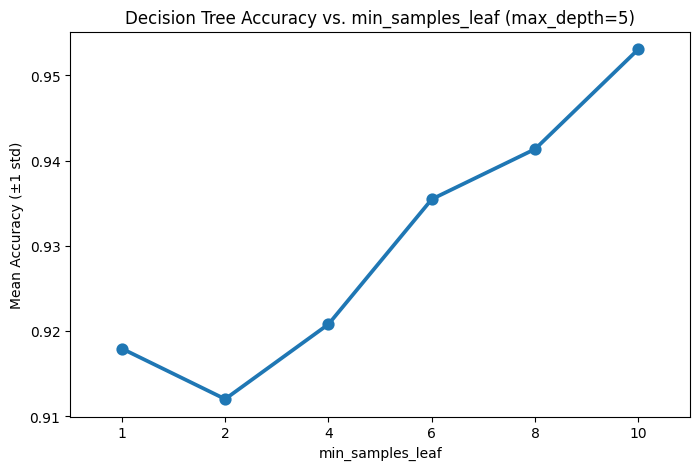

In [149]:
plt.figure(figsize=(8, 5))
sns.pointplot(
    data = results_df,
    x = 'min_samples_leaf',
    y = 'mean_acc',
    errorbar=('sd'),
    capsize=.1,
)
plt.title("Decision Tree Accuracy vs. min_samples_leaf (max_depth=5)")
plt.xlabel("min_samples_leaf")
plt.ylabel("Mean Accuracy (±1 std)")
plt.show()

## Exercise 3: Support Vector Machines (SVM)

### 3.1